In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt

In [2]:
current_directory = os.getcwd()
parent_directory = os.path.dirname(current_directory)
target_directory = os.path.join(parent_directory, 'csv_results')
target_file = os.path.join(target_directory, 'results_yoga1_10-09-00.csv')

In [3]:
df = pd.read_csv(target_file, index_col=0)

In [4]:

from mpl_toolkits.mplot3d import Axes3D  # Importing 3D plotting functionality

target_landmarks = [0, 11, 12, 13, 14, 15, 16, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32]

In [5]:
landmark_names = {
    0: "nose",
    1: "left_eye_inner",
    2: "left_eye",
    3: "left_eye_outer",
    4: "right_eye_inner",
    5: "right_eye",
    6: "right_eye_outer",
    7: "left_ear",
    8: "right_ear",
    9: "mouth_left",
    10: "mouth_right",
    11: "left_shoulder",
    12: "right_shoulder",
    13: "left_elbow",
    14: "right_elbow",
    15: "left_wrist",
    16: "right_wrist",
    17: "left_pinky",
    18: "right_pinky",
    19: "left_index",
    20: "right_index",
    21: "left_thumb",
    22: "right_thumb",
    23: "left_hip",
    24: "right_hip",
    25: "left_knee",
    26: "right_knee",
    27: "left_ankle",
    28: "right_ankle",
    29: "left_heel",
    30: "right_heel",
    31: "left_foot_index",
    32: "right_foot_index"
}

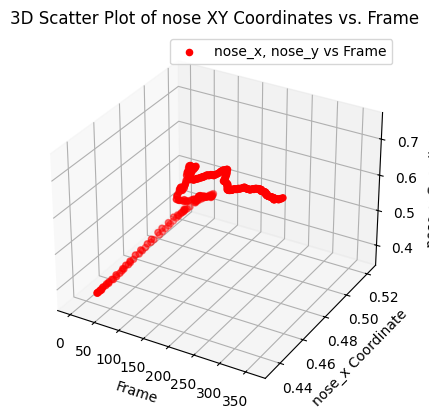

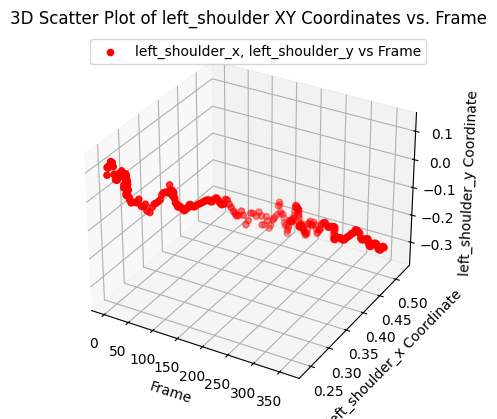

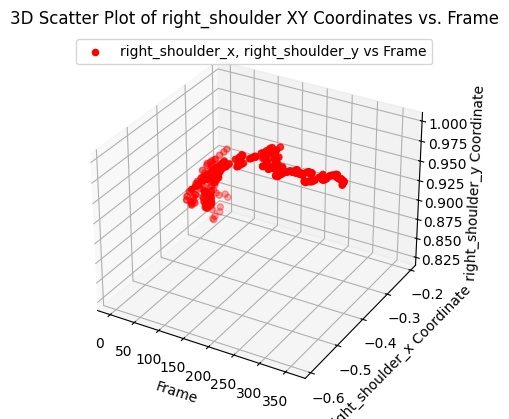

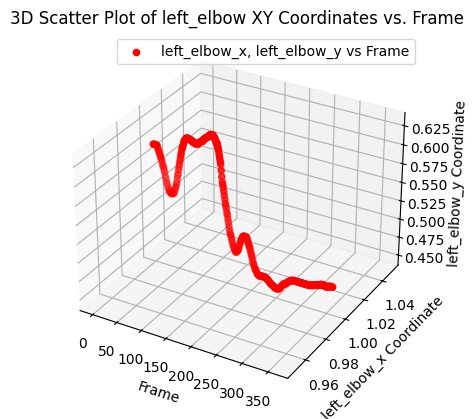

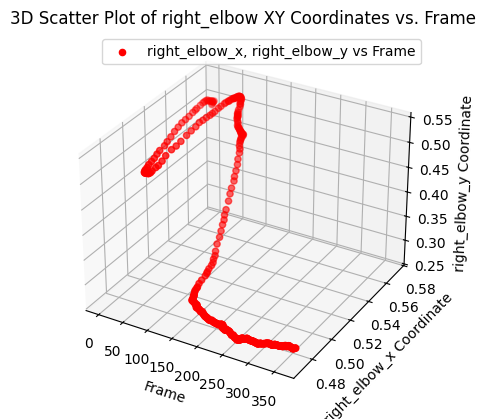

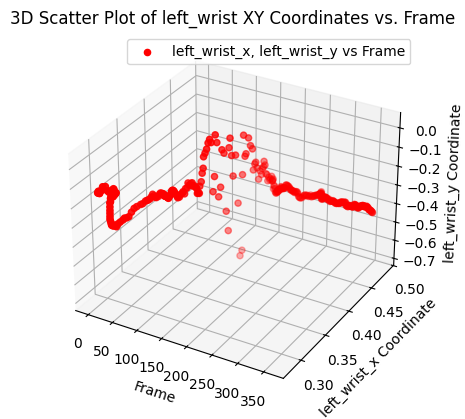

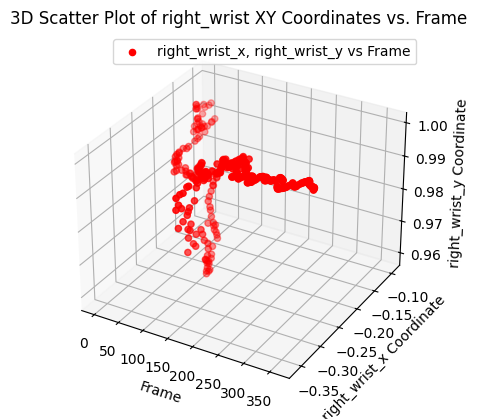

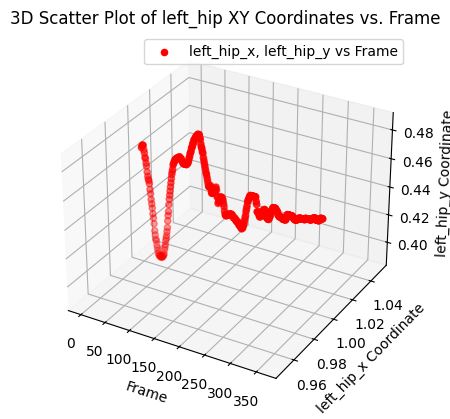

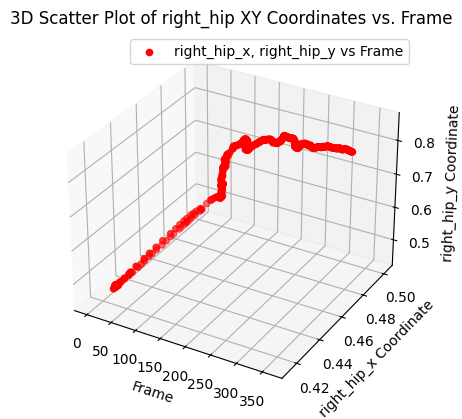

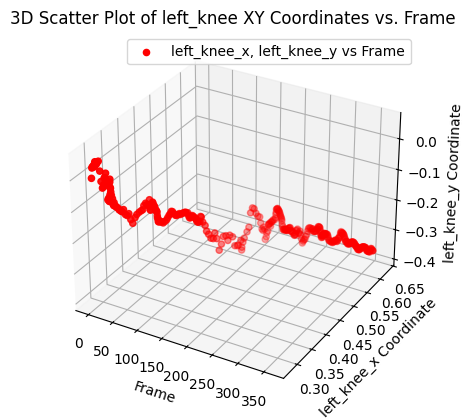

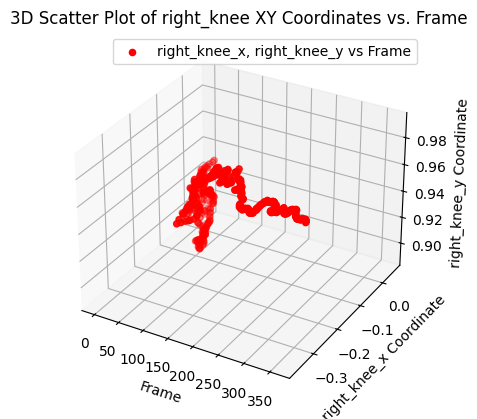

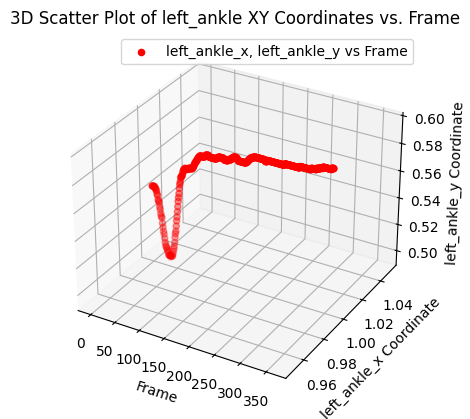

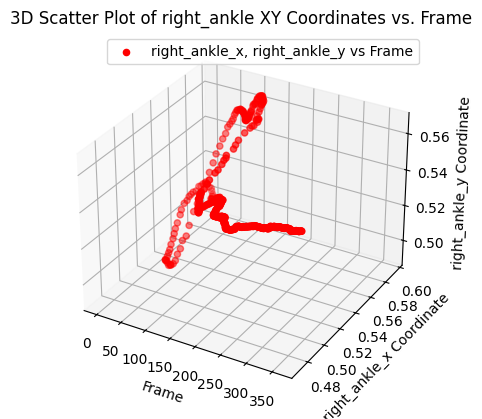

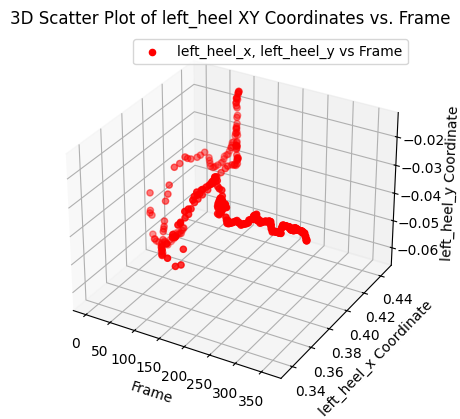

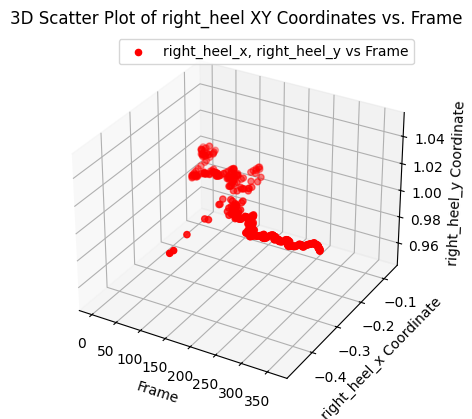

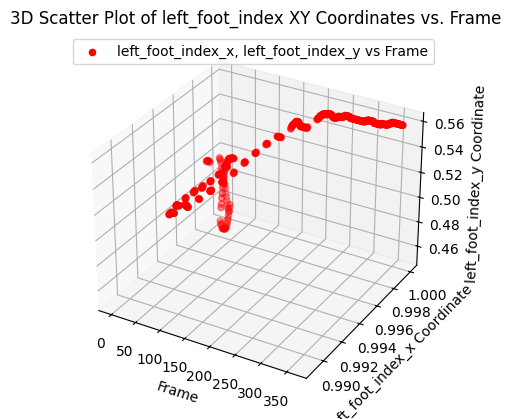

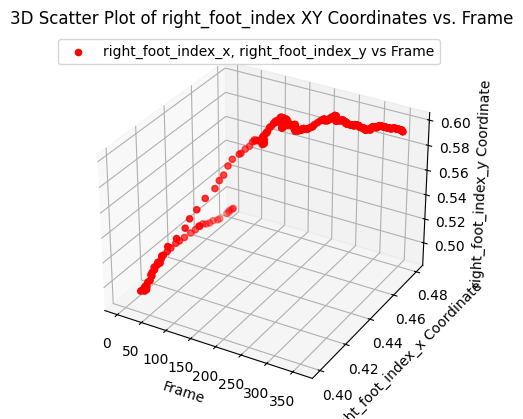

In [6]:
for landmark_id in target_landmarks:
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')

    # Get column names for x and y coordinates of the current landmark
    x_col = f'L{landmark_id}_x'
    y_col = f'L{landmark_id}_y'

    # Plot x and y coordinates against the index (Frame)
    ax.scatter(df.index, df[x_col], df[y_col], c='r', marker='o', label=f'{landmark_names[landmark_id]}_x, {landmark_names[landmark_id]}_y vs Frame')

    # Set labels and title
    ax.set_xlabel('Frame')
    ax.set_ylabel(f'{landmark_names[landmark_id]}_x Coordinate')
    ax.set_zlabel(f'{landmark_names[landmark_id]}_y Coordinate')
    plt.title(f'3D Scatter Plot of {landmark_names[landmark_id]} XY Coordinates vs. Frame')

    # Add legend
    plt.legend()

    # Show plot
    plt.show()

In [6]:
from matplotlib.animation import PillowWriter

writer = PillowWriter(fps=15)

0 0.291 -0.148
1 0.289 -0.151
2 0.289 -0.15
3 0.289 -0.15
4 0.289 -0.151
5 0.289 -0.151
6 0.29 -0.141
7 0.291 -0.137
8 0.292 -0.121
9 0.296 -0.128
10 0.298 -0.154
11 0.3 -0.165
12 0.302 -0.163
13 0.303 -0.164
14 0.303 -0.158
15 0.303 -0.162
16 0.303 -0.165
17 0.303 -0.149
18 0.303 -0.152
19 0.304 -0.173
20 0.304 -0.171
21 0.304 -0.169
22 0.302 -0.17
23 0.299 -0.169
24 0.296 -0.167
25 0.295 -0.167
26 0.293 -0.146
27 0.29 -0.15
28 0.288 -0.157
29 0.287 -0.171
30 0.285 -0.172
31 0.284 -0.189
32 0.283 -0.204
33 0.282 -0.216
34 0.281 -0.229
35 0.28 -0.24
36 0.28 -0.25
37 0.28 -0.261
38 0.28 -0.269
39 0.28 -0.268
40 0.281 -0.274
41 0.281 -0.268
42 0.283 -0.275
43 0.284 -0.282
44 0.286 -0.271
45 0.289 -0.268
46 0.293 -0.266
47 0.295 -0.26
48 0.298 -0.265
49 0.301 -0.265
50 0.305 -0.25
51 0.309 -0.239
52 0.313 -0.238
53 0.319 -0.24
54 0.322 -0.242
55 0.326 -0.237
56 0.328 -0.237
57 0.329 -0.237
58 0.332 -0.237
59 0.333 -0.229
60 0.335 -0.218
61 0.336 -0.227
62 0.338 -0.239
63 0.339 -0.242
64 0

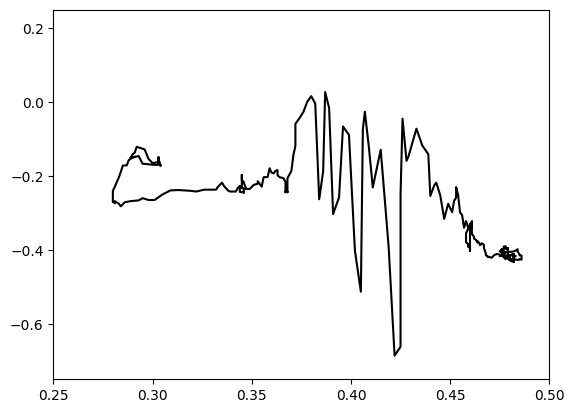

In [7]:
fig = plt.figure()
l, = plt.plot([],[], 'k-')

landmark_id = 15

x_col = f'L{landmark_id}_x'
y_col = f'L{landmark_id}_y'

x_vals = df[x_col]
y_vals = df[y_col]

x_min = 0.25
x_max = 0.5

y_min = -0.75
y_max = 0.25

plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)

x_list = []
y_list = []

with writer.saving(fig, 'yoga_results.gif', len(x_vals)):
    c = 0
    for x, y in zip(x_vals, y_vals):
        x_list.append(x)
        y_list.append(y)

        l.set_data(x_list, y_list)

        writer.grab_frame()
        print(c, x, y)
        c+=1
